# Machine Learning Basics
This notbook focuses on small concepts related to machine learning to illustrate the way the basic algorithms work. Each cell features a script that explains some of these more simple concepts related to basic learning

### Calculate Feature Windows
This function does a quick calculation of the number of calculations required given an image size and feature windows that fit within the image size using a sliding window approach.

In [1]:
# function calculates the number of feature windows needed
# to calculate for the given image and window size
# requires two lists, [width, height]
def featureWindows(imgSize, windowSize):
    
    coordList = []
    calcRequired = 0
    for y in range(0, imgSize[1] - windowSize[1]):
        for x in range(0, imgSize[0] - windowSize[0]):
            coordList.append((x, y))
            calcRequired += 1
    
    return calcRequired, coordList

imgSize = [640, 480]
windowSize = [6, 6]
calcRequired, coordList = featureWindows(imgSize, windowSize)
print('Calculations Required: ', calcRequired)

Calculations Required:  300516


### Integral Image
This is a useful concept to be familiar with for CV applications. An integral image computes the integral up until that given point in the input array. It allows later computations to be accelerated using these points.

More information here: [Summed Area Table](https://en.wikipedia.org/wiki/Summed-area_table)

In [3]:
imageList = [
        [12, 12, 136, 136, 136, 136, 0, 0], 
        [12, 12, 136, 136, 136, 136, 0, 0], 
        [12, 12, 12, 12, 0, 0, 0, 0], 
        [100, 100, 12, 12, 0, 0, 0, 0],
        [100, 100, 100, 100, 48, 48, 48, 48],
        [100, 100, 100, 100, 48, 48, 48, 48],
        [100, 100, 100, 100, 100, 100, 48, 48],
        [100, 100, 100, 100, 100, 100, 48, 48]]

def integral_image(imageList):
    integralList = []
    for j in range(0, len(imageList)):
        integralList.append([0 for i in range(0, len(imageList[0]))])

    for col in range(0, len(imageList)):
        for row in range(0, len(imageList[col])):
            if (col > 0) and (row > 0):
                integralList[col][row] = integralList[col-1][row] + integralList[col][row-1] + imageList[col][row] - integralList[col-1][row-1]
            elif (col > 0):
                integralList[col][row] = integralList[col-1][row] + imageList[col][row]
            elif (row > 0):
                integralList[col][row] = integralList[col][row-1] + imageList[col][row]
            else:
                integralList[col][row] = imageList[col][row]
    
    return integralList

integral = integral_image(imageList)
for row in integral:
    print(row)

[12, 24, 160, 296, 432, 568, 568, 568]
[24, 48, 320, 592, 864, 1136, 1136, 1136]
[36, 72, 356, 640, 912, 1184, 1184, 1184]
[136, 272, 568, 864, 1136, 1408, 1408, 1408]
[236, 472, 868, 1264, 1584, 1904, 1952, 2000]
[336, 672, 1168, 1664, 2032, 2400, 2496, 2592]
[436, 872, 1468, 2064, 2532, 3000, 3144, 3288]
[536, 1072, 1768, 2464, 3032, 3600, 3792, 3984]


### Calculate Euclidean Distance
Very basic explanation of calculating Euclidean distance between two points. This concept will be used in many of the following examples

In [31]:
# calculate the distance between two points
def distance(pointA, pointB):
    X = (pointA[0] - pointB[0])**2
    Y = (pointA[1] - pointB[1])**2

    return X+Y

points = [[2, 1],[3,1],[5,2],[6,0]]
centroids = [[2,1], [4.66,1]]

for point in points:
    for centroid in centroids:
        print('Points: ', end='')
        print(point, centroid)
        print('Distance: ', end='')
        print(distance(point, centroid))

Points: [2, 1] [2, 1]
Distance: 0
Points: [2, 1] [4.66, 1]
Distance: 7.0756000000000006
Points: [3, 1] [2, 1]
Distance: 1
Points: [3, 1] [4.66, 1]
Distance: 2.7556000000000003
Points: [5, 2] [2, 1]
Distance: 10
Points: [5, 2] [4.66, 1]
Distance: 1.1156
Points: [6, 0] [2, 1]
Distance: 17
Points: [6, 0] [4.66, 1]
Distance: 2.7955999999999994


### KMeans Clustering Demo
The following cell features a function to calculate the K-Means of a data set. It has all the associated helper functions along with it for better illustration.
K-Means works its way across a data set calculating centroids found in the data, with the number of centroids given by k. The more centroids, the more specific their locations will become

More info at: [K Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering)

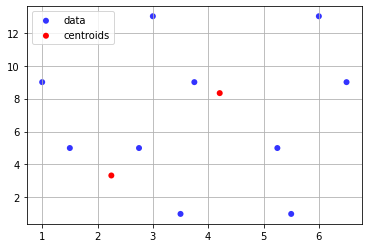

In [16]:
from math import sqrt
import numpy as np
import copy
import matplotlib.pyplot as plt

# calculate the euclidean distance between two points
# can be any number of dimensions
# expects last list value to be classification
def calculateDistance(point1, point2):
    distance = 0
    for i in range(0, len(point1)):
        distance += (point1[i] - point2[i])**2

    distance = sqrt(distance)
    return distance

def transposeList(lst):
    return list(zip(*lst))

def calculateCentroid(affinityList, data):

    tempData = copy.deepcopy(data)

    centroid = [0 for i in range(0, len(tempData[0])-1)]

    for i in range(0, len(tempData)):
        for j in range(0, len(tempData[i]) - 1):
            tempData[i][j] = affinityList[i] * tempData[i][j]

    tempData = transposeList(tempData)

    for i in range(0, len(tempData)-1):
        try:
            centroid[i] += sum(tempData[i]) / sum(affinityList)
        except:
            centroid[i] = 0

    return centroid

def getCentroids(data, k, iter):

    centAffinity = []
    # seed centroid location with first k values in the data list
    centroids = [data[j][:-1] for j in range(0, k)]

    for i in range(0, iter):
        centDist = []

        for centroid in centroids:
            distList = []
            for d in data:
                distList.append(calculateDistance(centroid, d[:-1]))
            centDist.append(distList)

        # transpose the list of distances
        centDist = transposeList(centDist)
        for column in centDist:
            for row in column:
                columnAffinity = [1 if row == min(column) else 0 for row in column ]
            centAffinity.append(columnAffinity)

        # transpose list into rows = centroids
        centAffinity = transposeList(centAffinity)
        
        # calculate new centroids
        centroids = [calculateCentroid(list, data) for list in centAffinity]

    return centroids

# data set
D = [[3,13,0],[2.75,5,0],[3.5,1,0],[3.75,9,0],[1,9,1],[1.5,5,1],[5.5,1,1],[5.25,5,1],[6.5,9,1],[6,13,1]]

centroids = getCentroids(D, 2, 10)

# plot the points
fig, ax = plt.subplots()
x = [D[i][0] for i in range(0, len(D))]
y = [D[i][1] for i in range(0, len(D))]
scatter = ax.scatter(x, y, c='blue', alpha=0.8, edgecolors='none', label='data')
x = [centroids[i][0] for i in range(0, len(centroids))]
y = [centroids[i][1] for i in range(0, len(centroids))]
ax.scatter(x, y, c='red', alpha=1, edgecolors='none', label='centroids')
ax.legend()
ax.grid(True)

plt.savefig("out.png")

### K Nearest Neighbor Demo
Another basic but important concept in identifying how data is connected.
The function getNeighbors will calculate the distance between a new point and all existing points in the data set and return these distances to these nearest neighbors. The number of neighbors returned is dicated by "k"
KNN will calculate the consensus of the type given by the data. If the data is split between what a 'dog' and 'cat' are, it will calculate how many of its neighbors are of which type and return the consensus on that type. If no consensus is able to be reached it returns -1.

For more info: [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [28]:
from math import sqrt
import numpy as np
from collections import Counter

# calculate the euclidean distance between two points
# can be any number of dimensions
# expects last list value to be classification
def calculateDistance(point1, point2):
    distance = 0
    for i in range(0, len(point1)):
        distance += (point1[i] - point2[i])**2

    distance = sqrt(distance)
    return distance

# calculate the nearest neighbors to a new point submitted
# requires a new point with the same dimensions as previous points
# data is a list of existing points
# k, the number of neigbors to return in a list
def getNeighbors(newPoint, data, k):
    distanceList = []

    for points in data:
        distance = calculateDistance(newPoint, points)
        distanceList.append([distance, points[-1]])

    distanceList.sort()
    neighbors = [distanceList[i] for i in range(0, k)]

    return neighbors

# calculates the distance between all data points and the new point
# then for k points counts the ones with the majority
# returns top classification, -1 if inconclusive
def getKNN(newPoint, data, k):

    topCount = 0

    neighbors = getNeighbors(newPoint, data, k)

    topNeighbors = [i[-1] for i in neighbors]
    neighborCount = Counter(topNeighbors)
    {k: v for k, v in sorted(neighborCount.items(), key=lambda item: item[1])}

    for k, v in neighborCount.items():
        if v == topCount:
            return -1
        if v > topCount:
            topCount = v
            topNeighbor = k

    return topNeighbor

D = [[3,13,0],[2.75,5,0],[3.5,1,0],[3.75,9,0],[1,9,1],[1.5,5,1],[5.5,1,1],[5.25,5,1],[6.5,9,1],[6,13,1]]

Dneighbors = getNeighbors([3,1], D, 4)
print('Nearest neighbors distance from the new point:')
print(Dneighbors)
Dneighbors = getKNN([3,1], D, 3)
print('Class consensus based on nearest neighbors')
print(Dneighbors)


Nearest neighbors distance from the new point:
[[0.5, 0], [2.5, 1], [4.00780488547035, 0], [4.272001872658765, 1]]
Class consensus based on nearest neighbors
0


### Intersection of Union
This concept calculates the percentage boxes overlap one another. Commonly used in bounding box calculations for removing redundant boxes via other means.
The algorithm calculates the intersection of two boxes divided by the union of the two boxes. 

More can be found here: [IOU](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/#:~:text=What%20is%20Intersection%20over%20Union,the%20popular%20PASCAL%20VOC%20challenge)

In [27]:
# receives in two lists of tuples
# [(min corner), (max corner)]
def IOU(ground_truth, prediction):
    
    # find our min/max values of the corners to find differences for intersection
    minX = min(ground_truth[1][0], prediction[1][0])
    minY = min(ground_truth[1][1], prediction[1][1])

    maxX = max(ground_truth[0][0], prediction[0][0])
    maxY = max(ground_truth[0][1], prediction[0][1])

    # max calculation catches if there is no intersection
    intArea = max(0, (minX - maxX)) * max(0, (minY - maxY))

    # calculate the area of the two rectangles using the differences beterrn corners
    truthArea = (ground_truth[1][0] - ground_truth[0][0]) * (ground_truth[1][1] - ground_truth[0][1])
    predictArea = (prediction[1][0] - prediction[0][0]) * (prediction[1][1] - prediction[0][1])

    # union area equals both areas minus intersection area
    unionArea = truthArea + predictArea - intArea

    return(intArea/unionArea)

box1 = [(268, 75), (392, 237)]
box2 = [(0, 0), (500, 336)]

score = IOU(box1, box2)
print('IOU Calculation of the two boxes:')
print(score)

IOU Calculation of the two boxes:
0.11957142857142856


### Non Max Supression
This algorithm is used to rule out the redundant bounding boxes mentioned previously. By setting a threshold of what boxes are relevant and which are not, this will rule out those that are less relevant and leave only the most probablistic boxes left. It refers to the above function so make sure to run that cell first.

More info here: [Non max supression](https://towardsdatascience.com/non-maximum-suppression-nms-93ce178e177c)

In [23]:
def nonmax_supression(B, S, N):
    
    indexes = np.argsort(S)
    returnList = []
    
    while len(indexes) > 0:
        
        i = int(indexes[-1:])
        indexes = np.delete(indexes, len(indexes)-1)
        returnList.append(i)
        
        popList = []
        # loop through the remaining indexes to compared to
        for j in range(0, len(indexes)):
            index = indexes[j]
            # create list of tuples to send to the previously designed IOU function
            box1 = [(boxes[index][0], boxes[index][1]), (boxes[index][2], boxes[index][3])]
            box2 = [(boxes[i][0], boxes[i][1]), (boxes[i][2], boxes[i][3])]
            score = IOU(box1, box2)
            if score > N:
                # append index that greater than our threshold for later deletion
                popList.append(j)
        
        # delete the indexes we've found to not meet threshold
        indexes = np.delete(indexes, popList, None)
    
    # create a new list of boxes to return that have met the requirements
    boxReturn = []
    for index in returnList:
        boxReturn.append(B[index])
        
    return boxReturn

boxes = [[268, 75, 392, 237],
 [0, 0, 500, 336],
 [203, 0, 431, 284],
 [289, 65, 381, 197],
 [173, 0, 431, 284],
 [0, 0, 415, 289],
 [241, 63, 392, 228],
 [268, 67, 430, 275],
 [79, 0, 354, 268],
 [289, 64, 381, 199],
 [0, 0, 319, 237],
 [199, 63, 430, 275]]

proba = [0.97811913, 0.9398855, 0.9236125, 0.958151, 0.97202075, 0.96799225,
 0.90226144, 0.91915226, 0.9557671, 0.928843, 0.9433805, 0.94493186]

boxList = nonmax_supression(boxes, proba, 0.7)
print('Boxes found with 70% probability threshold:')
print(boxList)
boxList = nonmax_supression(boxes, proba, 0.25)
print('Boxes found with 25% probability threshold:')
print(boxList)

Boxes found with 70% probability threshold:
[[268, 75, 392, 237], [173, 0, 431, 284], [0, 0, 415, 289], [289, 65, 381, 197], [79, 0, 354, 268], [199, 63, 430, 275], [0, 0, 319, 237], [268, 67, 430, 275]]
Boxes found with 25% probability threshold:
[[268, 75, 392, 237], [0, 0, 415, 289]]


### Common Network Activation Functions
The following cells demonstrate the basic differences between two very common activation functions, ReLU and sigmoid. 

More information about these here: [Activation Functions](https://en.wikipedia.org/wiki/Activation_function)

In [6]:
import numpy as np
import math

def sigmoid (number):
    return (1/(1 + math.exp(-number)))

def ReLU (number):
    if number > 0:
        return number
    else:
        return 0

In [7]:
def calculateWeights (inputArray, function=sigmoid):
    
    # create matrices for weight calculation
    hiddenWeights = np.linspace(0.01, 0.12, 12).reshape((4,3), order='F')
    outputWeights = np.linspace(0.17, 0.24, 8).reshape((2, 4), order='F')
    nodeBias = np.linspace(0.13, 0.16, 4).reshape((4, 1))
    outputBias = np.array([0.25, 0.26]).reshape((2,1))
    
    # make out matrix multiplications and additions
    nodes = np.matmul(hiddenWeights, inputArray) + nodeBias
    # run the designated function across the array and reshape
    nodes = np.array([function(xi) for xi in nodes]).reshape(4,1)

    output = np.matmul(outputWeights, nodes) + outputBias
    output = np.array([function(xi) for xi in output]).reshape(2,1)
    
    # return a concatenated list of the node values
    return np.concatenate((nodes.T, output.T), axis=1)

input = np.array([1, 5, 9]).reshape(3, 1)

results1 = calculateWeights(input)
results2 = calculateWeights(input, function=ReLU)
print(results1)
print(results2)

[[0.76852478 0.7957597  0.82053848 0.84290453 0.7105434  0.71916065]]
[[1.2    1.36   1.52   1.68   1.418  1.4856]]


### Results
| Function | Node1 | Node2 | Node3 | Node4 | Output1 | Output2 |
| ------ | ----- | ----- | ----- | ----- | ----- | ----- |
|   Sigmoid  | 0.768 | 0.795 | 0.820 | 0.842 | 0.710 | 0.719 |
|   ReLU  | 1.2 | 1.36 | 1.52 | 1.68 | 1.418 | 1.486 |